<a href="https://colab.research.google.com/github/NatBiscarra/challenge_alurastore/blob/main/Challenge ETL TelecomTelecomBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [131]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Análise realizada para descobrir as métricas de faturamento das quatro lojas da rede Challenge ETL Telecom Telecom.

In [87]:
lojas = [loja, loja2, loja3, loja4]                          #Lista "lojas" com as quatro variáveis
faturamento_total = 0                                        #Declaração de variável para armazenar o faturamento total

#Laço para percorrer a lista e retornar tuplas índice e valor.
for i, l in enumerate(lojas, start=1):                       # "start=1" para iniciar na loja 1
    faturamento = sum(l.Preço)                               #Atribui à variável "faturamento" a soma de todos os valores na coluna preço
    print(f'Faturamento da Loja {i}: R$ {faturamento:,.2f}') #Imprime o resultado no console
    faturamento_total += faturamento

#Imprime o faturamento total no console
print(f'\nFaturamento Total: R$ {faturamento_total:,.2f}')

#Atribui às variáveis "faturamento_loja" a soma dos valores da coluna preço
faturamento_loja = sum(loja.Preço)
faturamento_loja2 = sum(loja2.Preço)
faturamento_loja3 = sum(loja3.Preço)
faturamento_loja4 = sum(loja4.Preço)

Faturamento da Loja 1: R$ 1,534,509.12
Faturamento da Loja 2: R$ 1,488,459.06
Faturamento da Loja 3: R$ 1,464,025.03
Faturamento da Loja 4: R$ 1,384,497.58

Faturamento Total: R$ 5,871,490.79


Gráfico demonstrativo de faturamento da rede Challenge ETL Telecom Telecom.

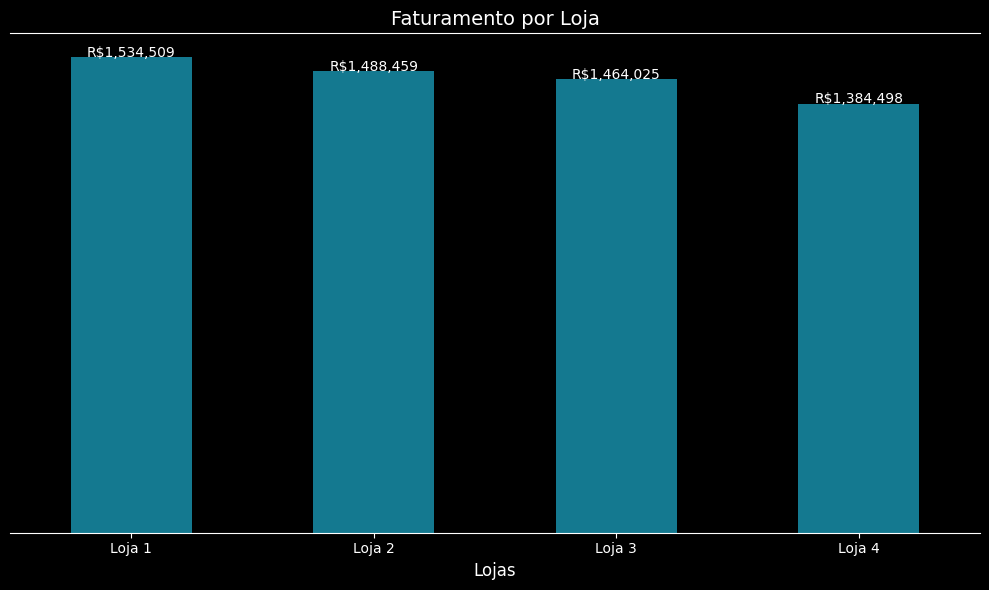

In [88]:
import matplotlib.pyplot as plt        #Importa a biblioteca matplotlib (gráficos)
import pandas as pd                    #Importa a biblioteca pandas (manipulação de dados)

#Define listas com nome e valores de faturamento das lojas
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

#Cria um dataframe com duas colunas (loja e faturamento)
df_faturamento = pd.DataFrame({'Loja': lojas_nomes, 'Faturamento': faturamentos})

#Define um gráfico de barra para exibir "loja" e "faturamento"
ax = df_faturamento.plot(kind='bar', x='Loja', y='Faturamento', figsize=(10, 6), legend=False, color = '#147990')

#Laço para adicionar os rótulos de valor em cada barra
for i, valor in enumerate(df_faturamento['Faturamento']):
    ax.text(i, valor + 500, f'R${valor:,.0f}', ha='center')

#Estiliza os títulos do gráfico
ax.set_title('Faturamento por Loja', fontsize=14)
ax.set_xlabel('Lojas', fontsize=12)
ax.set_ylabel('Faturamento (R$)')

#Rótulo exibido na horizontal
ax.set_xticklabels(df_faturamento['Loja'], rotation=0)

#Desativa visualização do eixo y
ax.yaxis.set_visible(False)
ax.spines[['left', 'right']].set_visible(False)

#Exibição do gráfico no console
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Análise de performance para cada categoria em cada loja.

In [89]:
#Cria listas com dados e nome das lojas
lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

vendas_por_categoria = [
    l.groupby('Categoria do Produto').size().rename(n) #Agrupa vendas por categoria; .size() contabiliza a qtd de vendas em cada categoria; .rename(n) renomeia os resultados com nome da loja
    for l, n in zip(lojas, nomes)] #Laço para percorrer duas listas ao mesmo tempo

#Concatena em um único dataframe (axis=1 cria colunas)
vendas_por_categoria = pd.concat(vendas_por_categoria, axis=1)
vendas_por_categoria.columns = nomes #Renomeia as colunas com os nomes das lojas

#Exibe no console o resultado
print(vendas_por_categoria)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


Gráficos demonstrativos das vendas por categoria.

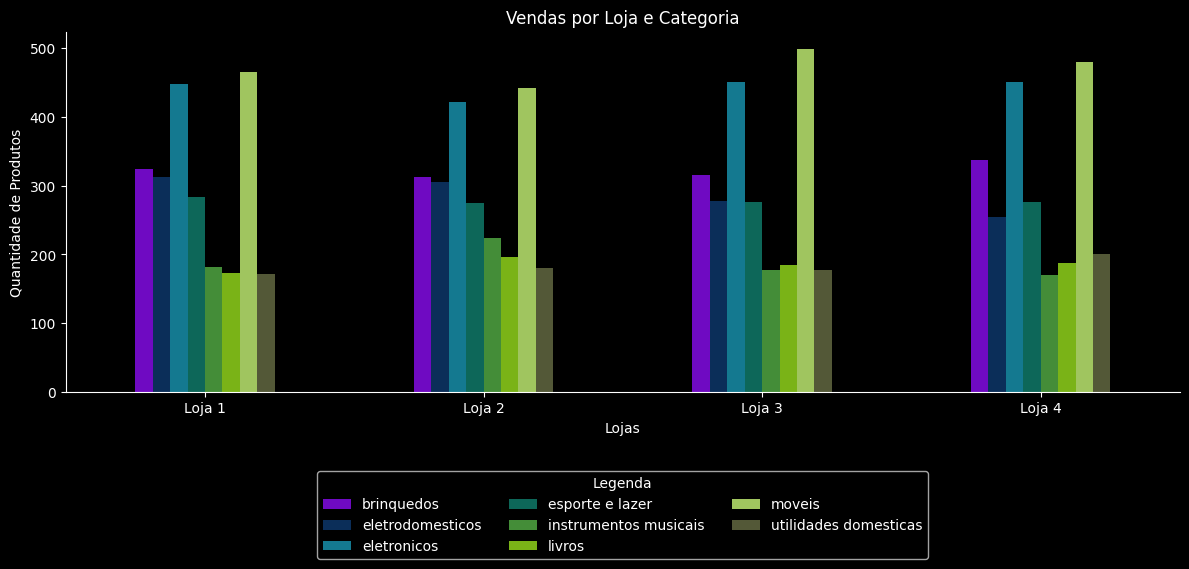

In [118]:
#Transposição para que a coluna "loja" vire linha
grafico_plot = vendas_por_categoria.T

cores = ['#6F0AC2', '#0B2E59', '#147990', '#0D6759', '#448D38', '#7AB317', '#A0C55F', '#535837']

#Criação do gráfico em barras
grafico_plot.plot(kind='bar', figsize=(12, 6), color=cores[:grafico_plot.shape[1]])

#Título de rótulos
plt.title('Vendas por Loja e Categoria')
plt.ylabel('Quantidade de Produtos')
plt.xlabel('Lojas')
plt.xticks(rotation=0)

#Legenda do gráfico
plt.legend(title='Legenda', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=10, labelcolor = 'white')

#Bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

#Exibição do gráfico
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

Análise realizada com base nas avaliações recebidas por cada loja.

In [91]:
lojas = [loja, loja2, loja3, loja4]

for i, l in enumerate(lojas, start=1):
    avaliacao = round(sum(l["Avaliação da compra"]) / len(l["Avaliação da compra"]), 2)
    print(f'Avaliação da loja{i}:', avaliacao)

Avaliação da loja1: 3.98
Avaliação da loja2: 4.04
Avaliação da loja3: 4.05
Avaliação da loja4: 4.0


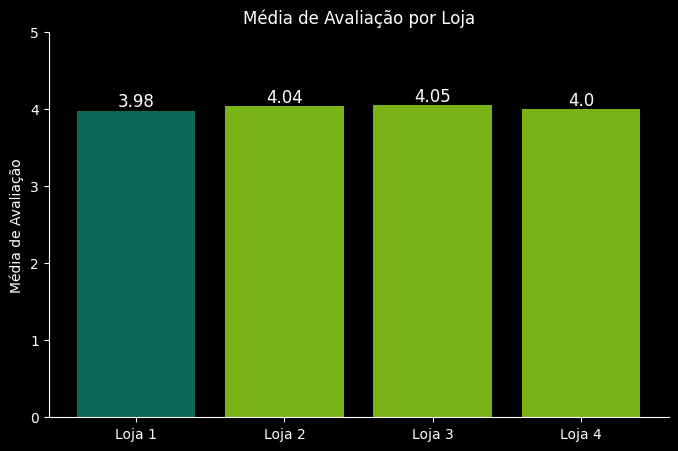

In [143]:
#Importa a biblioteca matplotlib
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.98, 4.04, 4.05, 4.0]

#Atribui uma cor diferente para a menor média
pior_media = min(medias)
cores = ['#7AB317' if media != pior_media else '#0D6759' for media in medias]

#Criação do gráfico
plt.figure(figsize=(8, 5))
plt.bar(lojas, medias, color=cores)

#Títulos e rótulos
plt.title('Média de Avaliação por Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)

for i, media in enumerate(medias):
    plt.text(i, media, f'{media}', ha='center', va='bottom', fontsize=12)

#Bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.show()


# 4. Produtos Mais e Menos Vendidos

Análise realizada para verificar quais são com maior número de compras e os produtos menos desejados pelos clientes.

In [93]:
#Cria um dataframe com o nome dos produtos e a soma das parcelas vendidas
produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
#Ordena o dataframe de menor para maior quantidade vendida
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade", ascending=False)

#Exibe no console os 3 produtos mais e menos vendidos para cada loja
print("LOJA 1\n")
print("Produtos mais vendidos:\n")
print(produtos_loja1.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja1.tail(3).to_string(index=False))
print("-------------------------------------\n")

print("LOJA 2\n")
print("Produtos mais vendidos:\n")
print(produtos_loja2.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja2.tail(3).to_string(index=False))
print("-------------------------------------\n")

print("LOJA 3\n")
print("Produtos mais vendidos:\n")
print(produtos_loja3.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja3.tail(3).to_string(index=False))
print("-------------------------------------\n")

print("LOJA 4\n")
print("Produtos mais vendidos:\n")
print(produtos_loja4.head(3).to_string(index=False))
print("\nProdutos menos vendidos:\n")
print(produtos_loja4.tail(3).to_string(index=False))
print("-------------------------------------\n")

LOJA 1

Produtos mais vendidos:

           Produto  Quantidade
Secadora de roupas         214
     TV Led UHD 4K         196
            Cômoda         188

Produtos menos vendidos:

       Produto  Quantidade
Dinossauro Rex          94
       Mochila          90
  Celular ABXY          78
-------------------------------------

LOJA 2

Produtos mais vendidos:

                 Produto  Quantidade
Iniciando em programação         223
        Celular Plus X42         195
                  Violão         183

Produtos menos vendidos:

       Produto  Quantidade
     Bicicleta          98
 Jogo de copos          98
Mesa de jantar          89
-------------------------------------

LOJA 3

Produtos mais vendidos:

          Produto  Quantidade
        Bicicleta         191
            Fogão         182
Jogo de tabuleiro         181

Produtos menos vendidos:

      Produto  Quantidade
     Guitarra         100
   Smartwatch         100
TV Led UHD 4K          94
------------------------------

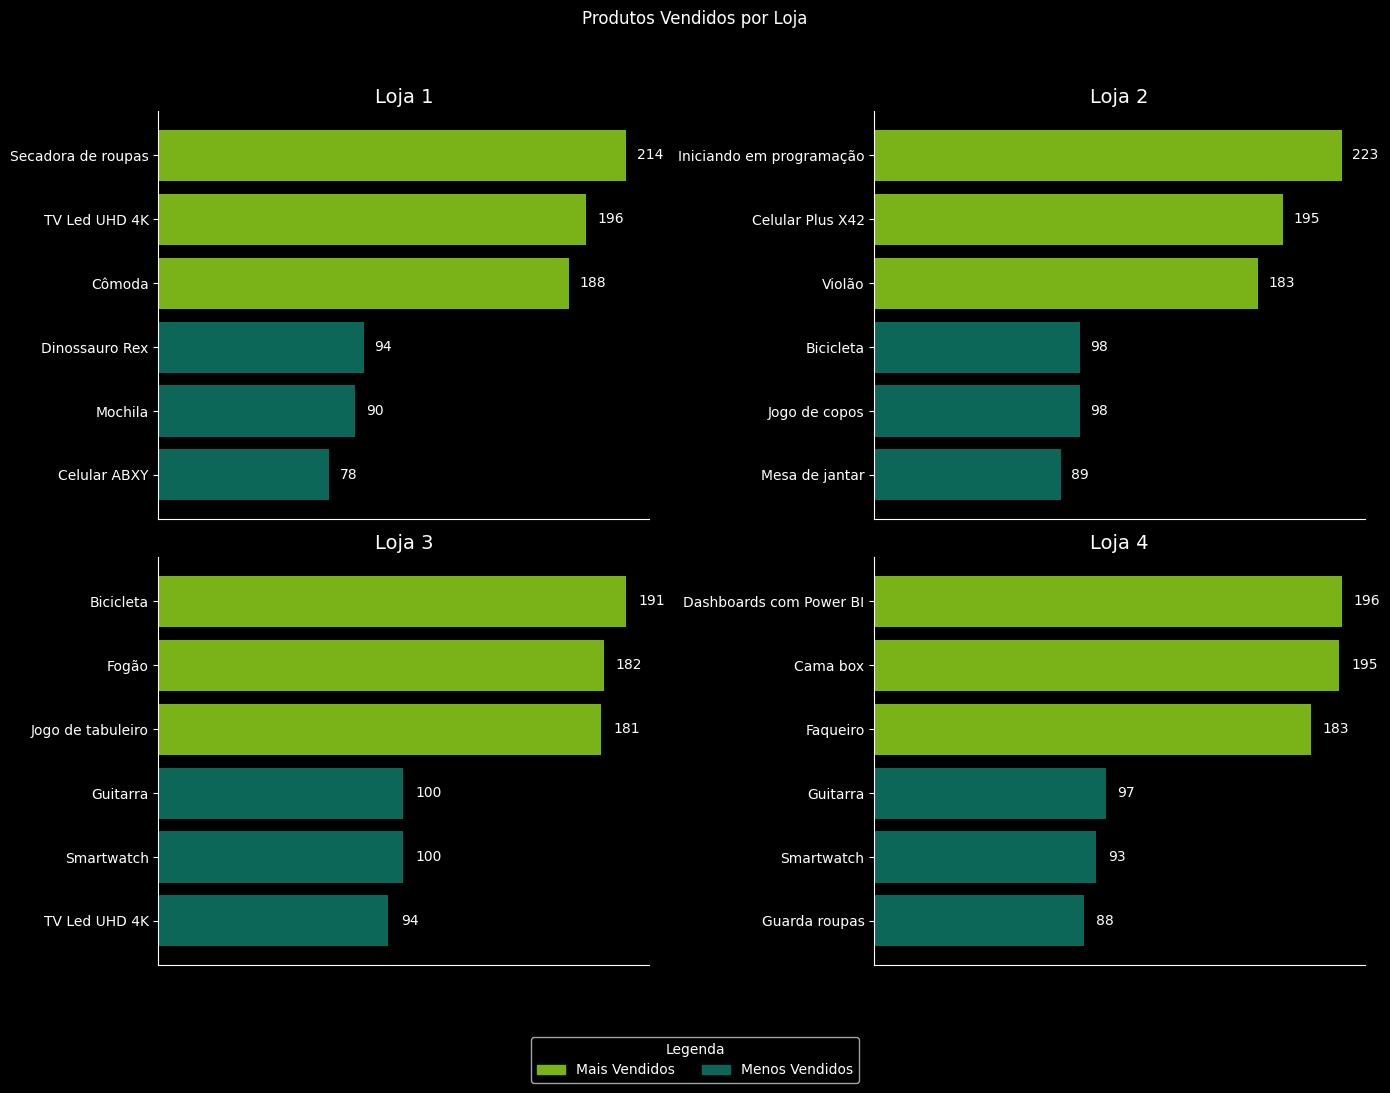

In [128]:
#Importar bibliotecas matplotlib e pandas
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

#Cria um dicionário para armazenar chave-valor
produtos_por_loja = {
    'Loja 1': (produtos_loja1.head(3), produtos_loja1.tail(3)),
    'Loja 2': (produtos_loja2.head(3), produtos_loja2.tail(3)),
    'Loja 3': (produtos_loja3.head(3), produtos_loja3.tail(3)),
    'Loja 4': (produtos_loja4.head(3), produtos_loja4.tail(3))
}

#Define as cores para cada categoria
cores_top = '#7AB317'
cores_flop = '#0D6759'

#Cria uma figura com 4 subpolots (2 linhas e 2 colunas)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

#Loop que itera lista lojas
for i, loja in enumerate(lojas):
    top3, flop3 = produtos_por_loja[loja]

    #Cria um dataframe com os 6 produtos
    dados = pd.concat([top3, flop3])

    #Plota os produtos mais vendidos
    axs[i].barh(top3["Produto"], top3["Quantidade"], color=cores_top, label="Mais Vendidos")
    #Plota os produtos menos vendidos
    axs[i].barh(flop3["Produto"], flop3["Quantidade"], color=cores_flop, label="Menos Vendidos")

    #Ajusta a parte visual do gráfico
    axs[i].set_title(loja, fontsize=14)
    axs[i].invert_yaxis()
    axs[i].xaxis.set_visible(False)
    axs[i].grid(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(True)
    axs[i].spines['left'].set_visible(True)

    for j, v in enumerate(dados["Quantidade"]):
        axs[i].text(v + 5, j, str(v), va='center', fontsize=10)

#Cria os patches para a legenda
top_patch = mpatches.Patch(color=cores_top, label='Mais Vendidos')
flop_patch = mpatches.Patch(color=cores_flop, label='Menos Vendidos')

#Legenda única para a figura
fig.legend(handles=[top_patch, flop_patch], title='Legenda', bbox_to_anchor=(0.5, -0.1), loc='lower center', ncol=3, fontsize=10)

#Plota a figura com 4 gráficos
fig.suptitle('Produtos Vendidos por Loja')
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()



# 5. Frete Médio por Loja


Cálculo dos valores médios de frete para cadaa loja.

In [135]:
#Cria um dicionário para armazenar chave-valor
lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

#Loop para criar dataframe da loja
for nome, dados in lojas.items():
    frete_medio = round(dados['Frete'].sum() / len(dados['Frete']), 2)

    print(f'O valor médio de frete da {nome} é: R$ {frete_medio}')

O valor médio de frete da Loja 1 é: R$ 34.69
O valor médio de frete da Loja 2 é: R$ 33.62
O valor médio de frete da Loja 3 é: R$ 33.07
O valor médio de frete da Loja 4 é: R$ 31.28


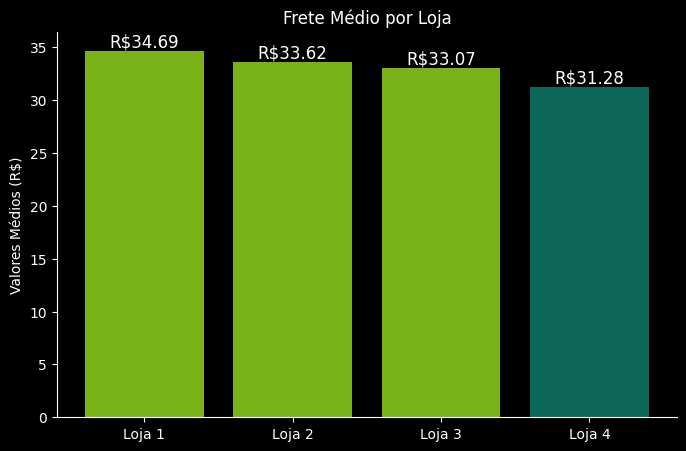

In [142]:
#Importa a biblioteca matplotlib
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [34.69, 33.62, 33.07, 31.28]

#Atribui uma cor diferente para a menor média
menor_frete = min(medias)
cores = ['#7AB317' if media != menor_frete else '#0D6759' for media in medias]

#Criação do gráfico
plt.figure(figsize=(8, 5))
plt.bar(lojas, medias, color=cores)

#Títulos e rótulos
plt.title('Frete Médio por Loja')
plt.ylabel('Valores Médios (R$)')

for i, media in enumerate(medias):
    plt.text(i, media, f'R${media}', ha='center', va='bottom', fontsize=12)

#Bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.show()

# Relatório

---





## 1.   Faturamento das lojas 💰




A partir da análise realizada para as quatro lojas da rede Challenge ETL Telecom Telecom, foi possível identificar que a `Loja 1` apresentou `maior` faturamento (`R$ 1.534.509,12`) no período analisado.
Em contrapartida, a `Loja 4` apresentou o `menor` faturamento (`R$ 1.384.497,58`).



## 2.   Vendas por Categoria 📊




Dentre as quatro lojas Challenge ETL Telecom Telecom foi possível identificar que há um padrão de compras, com a preferência por itens relacionados às categorias de móveis, eletrônicos brinquedos e eletrodomésticos, os quais  são considerados produtos que possuem maior valor agregado.
Porém, também pode ser observado que na `Loja 4` há uma mudança de pedrão, em que a categoria que ocupa o 4º lugar em compras são os itens de esporte e lazer, os quais conferem um menor valor agregado, portanto, menor lucro em relação às demais.

👉**Loja 1:**  

*   1º Móveis (465 itens)
*   2º Eletrônicos (448 itens)
*   3º Brinquedos (324 itens)
*   4º Eletrodomésticos (312 itens)
*   5º Esporte e lazer (284 itens)
*   6º Instrumentos musicais (182 itens)
*   7º Livros (173 itens)
*   8º Utilidades domésticas (171 itens)    

👉**Loja 2:**  

*   1º Móveis (442 itens)
*   2º Eletrônicos (422 itens)
*   3º Brinquedos (313 itens)
*   4º Eletrodomésticos (305 itens)
*   5º Esporte e lazer (275 itens)
*   6º Instrumentos musicais (224 itens)
*   7º Livros (197 itens)
*   8º Utilidades domésticas (181 itens)

👉**Loja 3:**  

*   1º Móveis (499 itens)
*   2º Eletrônicos (451 itens)
*   3º Brinquedos (315 itens)
*   4º Eletrodomésticos (278 itens)
*   5º Esporte e lazer (277 itens)
*   6º Livros (185 itens)
*   7º Instrumentos musicais (177 itens)
*   8º Utilidades domésticas (177 itens)

👉**Loja 4:**  

*   1º Móveis (480 itens)
*   2º Eletrônicos (451 itens)
*   3º Brinquedos (338 itens)
*   4º Esporte e lazer (277 itens)
*   5º Eletrodomésticos (254 itens)
*   6º Utilidades domésticas (201 itens)
*   7º Livros (187 itens)
*   8º Instrumentos musicais (170 itens)




## 3.   Avaliação das Lojas ⭐



 Os valores médios de avaliação das quatro lojas foram muito próximos.



*  ⬇ A `Loja 1` apresentou a **menor média de avaliação (3,98)**, ainda que o valor seja considerado uma nota satisfatória. Esse resultado pode estar relacionado a uma logística menos eficiente — como sugerido pelo frete médio mais alto — ou a falhas pontuais no pós-venda.
*   ⬆ A `Loja 3` apresentou a **maior média de avaliação (4,05)**, o que pode indicar uma maior satisfação dos clientes, refletindo uma boa experiência de compra, qualidade dos produtos e eficiência no atendimento e na entrega.








## 4.   Produtos Mais e Menos Vendidos 📦



**Loja 1**

⬆Produtos mais vendidos:
*   Secadora de roupas (214 unidades)
*   TV LED UHD 4K (196 unidades)
*   Cômoda (188 unidades)

⬇Produtos menos vendidos:
*   Dinossauro rex (94 unidades)
*   Mochila (90 unidades)
*   Celular ABXY (78 unidades)

**Loja 2**

⬆Produtos mais vendidos:
*   Livro Iniciando em Programação (223 unidades)
*   Celular Plus X42 (195 unidades)
*   Violão (183 unidaade)

⬇Produtos menos vendidos:
*   Bicicleta (98 unidades)
*   Jogo de copos (98 unidades)
*   Mesa de jantar (89 unidades)

**Loja 3**

⬆Produtos mais vendidos:
*   Bicicleta (191 unidades)
*   Fogão (182 unidades)
*   Jogo de tabuleiro (181 unidades)

⬇Produtos menos vendidos:
*   Guitarra (100 unidades)
*   Smartwatch (100 unidades)
*   TV LED UHD 4K (94 unidades)

**Loja 4**

⬆Produtos mais vendidos:
*   Curso Dashboard Power BI (196 unidades)
*   Cama box (195 unidades)
*   Faqueiro (183 unidades)

⬇Produtos menos vendidos:
*   Guitarra (97 unidades)
*   Smartwatch (93 unidades)
*   Guarda-roupas (88 unidades)



## 5.   Frete Médio 🚚




**Loja 1: R$ 34.69**


*   Maior custo total de frete e maior frete médio em comparação com as demais lojas;
*   Cenário pode ser reflexo de um elevado volume de pedidos.

**Loja 2: R$ 33.62**


*   Custos totais e médios de frete ligeiramente inferiores aos da Loja 1;
*   Volume de vendas similar, acompanhado de uma operação logística potencialmente mais otimizada.

**Loja 3: R$ 33.07**

*   Menor custo total de frete e o menor frete médio dentre as lojas analisadas, indicando uma maior eficiência logística;
*   Resultado pode estar relacionado a fatores como planejamento de rotas aprimorado, maior volume de itens por pedido ou localização geográfica mais favorável.

**Loja 4: R$ 31.28**

*   Apresenta o menor custo total de frete e o menor frete médio, concomitantemente com o menor volume de vendas;
*   Custos de frete reduzidos estão mais associados ao baixo volume de transações comerciais da loja do que a melhorias significativas na eficiência da sua logística.



# Conclusão

---



*  **Loja Mais Vantajosa: Loja 1** 🏅 (Maior faturamento, bom desempenho nas categorias de alto valor, boa avaliação média e produtos com alta receita).
*   **Loja Menos Vantajosa: Loja 4** ❌ (Menor faturamento, desempenho abaixo nas vendas gerais, avaliação média razoável e produtos com baixa receita).
*  **Loja a ser Vendida pelo Sr. João: Loja 4** ❌ (Devido ao menor faturamento, baixo desempenho e falta de rentabilidade).